## Warwick Quant Society - Understanding Core Python Libraries

In this workshop, we try using the following versatile Python libraries in a financial perspective:

- numpy
- pandas
- matplotlib.pyplot
- yfinance


In [67]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.interpolate import make_interp_spline, BSpline

                                 Open       Close         Low        High
Date                                                                     
2024-12-10 00:00:00-05:00  246.889999  247.770004  245.339996  248.210007
2024-12-11 00:00:00-05:00  247.960007  246.490005  246.259995  250.800003
2024-12-12 00:00:00-05:00  246.889999  247.960007  245.679993  248.740005
2024-12-13 00:00:00-05:00  247.820007  248.130005  246.240005  249.289993
2024-12-16 00:00:00-05:00  247.990005  251.039993  247.649994  251.380005
2024-12-17 00:00:00-05:00  250.080002  253.479996  249.779999  253.830002
2024-12-18 00:00:00-05:00  252.160004  248.050003  247.740005  254.279999
2024-12-19 00:00:00-05:00  247.500000  249.789993  247.089996  252.000000
2024-12-20 00:00:00-05:00  248.039993  254.490005  245.690002  255.000000
2024-12-23 00:00:00-05:00  254.770004  255.270004  253.449997  255.649994
2024-12-24 00:00:00-05:00  255.490005  258.200012  255.289993  258.209991
2024-12-26 00:00:00-05:00  258.190002 

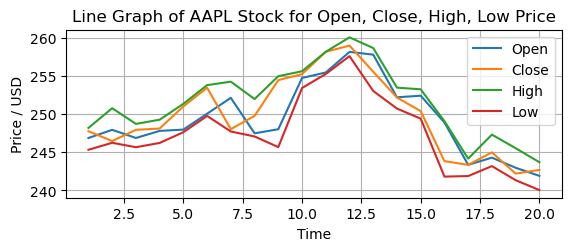

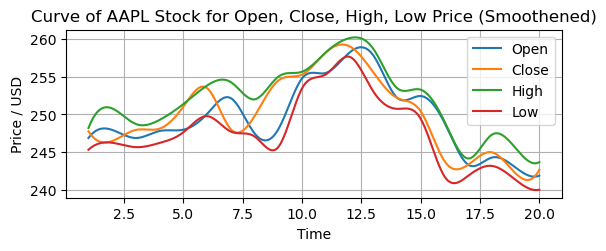

In [87]:
stock = 'AAPL'

start_date = '2024-12-10'
end_date = '2025-01-10'

properties = ['Open', 'Close', 'Low', 'High']

stock_data = {}

for Property in properties:
    ticker = yf.Ticker(stock)
    stock_data[Property] = ticker.history(start = start_date, end = end_date)[Property]

open_stock = stock_data["Open"]
close_stock = stock_data["Close"]
high_stock = stock_data["High"]
low_stock = stock_data["Low"]

stock_df = pd.DataFrame(stock_data)

print(stock_df)

time = np.linspace(1, open_stock.size, open_stock.size)

#define x as 200 equally spaced values between the min and max of original x 
tnew = np.linspace(time.min(), time.max(), 400) 

#define spline
splo = make_interp_spline(time, open_stock, k=3)
splc = make_interp_spline(time, close_stock, k=3)
splh = make_interp_spline(time, high_stock, k=3)
spll = make_interp_spline(time, low_stock, k=3)
o_smooth = splo(tnew)
c_smooth = splc(tnew)
h_smooth = splh(tnew)
l_smooth = spll(tnew)

plt.subplot(2, 1, 1)
plt.plot(time, open_stock, label = "Open")
plt.plot(time, close_stock, label = "Close")
plt.plot(time, high_stock, label = "High")
plt.plot(time, low_stock, label = "Low")
plt.title("Line Graph of AAPL Stock for Open, Close, High, Low Price for 10 Dec 2024 to 10 Jan 2025")
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.legend()
plt.grid()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(tnew, o_smooth, label = "Open")
plt.plot(tnew, c_smooth, label = "Close")
plt.plot(tnew, h_smooth, label = "High")
plt.plot(tnew, l_smooth, label = "Low")
plt.title("Curve of AAPL Stock for Open, Close, High, Low Price (Smoothened) for 10 Dec 2024 to 10 Jan 2025")
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.legend()
plt.grid()
plt.show()

Date
2024-12-10 00:00:00-05:00    2.870010
2024-12-11 00:00:00-05:00    4.540009
2024-12-12 00:00:00-05:00    3.060013
2024-12-13 00:00:00-05:00    3.049988
2024-12-16 00:00:00-05:00    3.730011
2024-12-17 00:00:00-05:00    4.050003
2024-12-18 00:00:00-05:00    6.539993
2024-12-19 00:00:00-05:00    4.910004
2024-12-20 00:00:00-05:00    9.309998
2024-12-23 00:00:00-05:00    2.199997
2024-12-24 00:00:00-05:00    2.919998
2024-12-26 00:00:00-05:00    2.470001
2024-12-27 00:00:00-05:00    5.640015
2024-12-30 00:00:00-05:00    2.750000
2024-12-31 00:00:00-05:00    3.850006
2025-01-02 00:00:00-05:00    7.279999
2025-01-03 00:00:00-05:00    2.289993
2025-01-06 00:00:00-05:00    4.130005
2025-01-07 00:00:00-05:00    4.199997
2025-01-08 00:00:00-05:00    3.660004
Name: Daily_Price_Range, dtype: float64


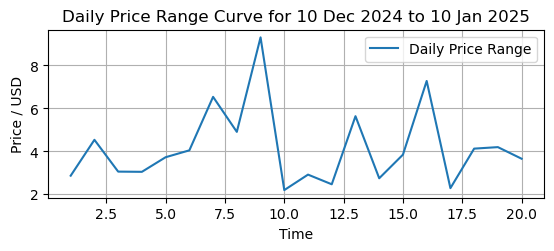

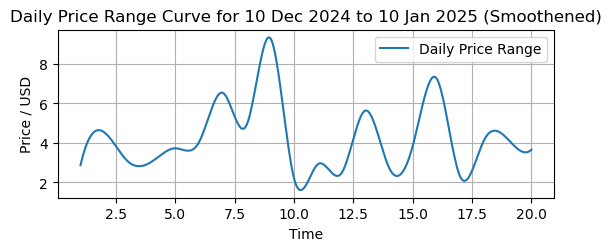

In [97]:
stock_df['Daily_Price_Range'] = stock_df['High'] - stock_df['Low']
print(stock_df['Daily_Price_Range'])

plt.subplot(2, 1, 1)
plt.plot(time, stock_df['Daily_Price_Range'], label = 'Daily Price Range')
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.title('Daily Price Range Curve for 10 Dec 2024 to 10 Jan 2025')
plt.legend()
plt.grid()
plt.show()


splr = make_interp_spline(time, stock_df['Daily_Price_Range'], k=3)
r_smooth = splr(tnew)

plt.subplot(2, 1, 2)
plt.plot(tnew, r_smooth, label = 'Daily Price Range')
plt.xlabel("Time")
plt.ylabel("Price / USD")
plt.title('Daily Price Range Curve for 10 Dec 2024 to 10 Jan 2025 (Smoothened)')
plt.grid()
plt.legend()
plt.show()

